# DonorsChoose

##### <p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/train_data.csv')
resource_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity  
0         4  
1         8

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +' '+\
                        project_data["project_essay_2"].map(str) + ' '+\
                        project_data["project_essay_3"].map(str) + ' '+\
                        project_data["project_essay_4"].map(str)
#Some projects have no 3rd and 4th eassay. So those projects have NaN values in that rows. 
#we want we can remove it later either by considering it as stop word or using regular expression.

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[48999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons. My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students. Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, 

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub('nan','',phrase) #Removing nan from each essay.
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

\"Life moves pretty fast. If you do not stop and look around once in awhile, you could miss it.\"  from the movie, Ferris Bueller is Day Off.  Think back...what do you remember about your grandparents?  How amazing would it be to be able to flip through a book to see a day in their lives? My second graders are voracious readers! They love to read both fiction and nonfiction books.  Their favorite characters include Pete the Cat, Fly Guy, Piggie and Elephant, and Mercy Watson. They also love to read about insects, space and plants. My students are hungry bookworms! My students are eager to learn and read about the world around them. My kids love to be at school and are like little sponges absorbing everything around them. Their parents work long hours and usually do not see their children. My students are usually cared for by their grandparents or a family friend. Most of my students do not have someone who speaks English at home. Thus it is difficult for my students to acquire language

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 Life moves pretty fast. If you do not stop and look around once in awhile, you could miss it.   from the movie, Ferris Bueller is Day Off.  Think back...what do you remember about your grandparents?  How amazing would it be to be able to flip through a book to see a day in their lives? My second graders are voracious readers! They love to read both fiction and nonfiction books.  Their favorite characters include Pete the Cat, Fly Guy, Piggie and Elephant, and Mercy Watson. They also love to read about insects, space and plants. My students are hungry bookworms! My students are eager to learn and read about the world around them. My kids love to be at school and are like little sponges absorbing everything around them. Their parents work long hours and usually do not see their children. My students are usually cared for by their grandparents or a family friend. Most of my students do not have someone who speaks English at home. Thus it is difficult for my students to acquire language. 

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 Life moves pretty fast If you do not stop and look around once in awhile you could miss it from the movie Ferris Bueller is Day Off Think back what do you remember about your grandparents How amazing would it be to be able to flip through a book to see a day in their lives My second graders are voracious readers They love to read both fiction and nonfiction books Their favorite characters include Pete the Cat Fly Guy Piggie and Elephant and Mercy Watson They also love to read about insects space and plants My students are hungry bookworms My students are eager to learn and read about the world around them My kids love to be at school and are like little sponges absorbing everything around them Their parents work long hours and usually do not see their children My students are usually cared for by their grandparents or a family friend Most of my students do not have someone who speaks English at home Thus it is difficult for my students to acquire language Now think forward would not i

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.remove('not')
stopwords.remove('no')
stopwords.remove('nor')

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:46<00:00, 2330.84it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
print(project_data['project_title'].values[9])
print(project_data['project_title'].values[29877])
print(project_data['project_title'].values[8607])

Dash and Dot Robotic Duo Needed
Dancing Our Way to Healthy Choices
Move and Groove...Outside Play


In [19]:
preprocessed_title = []
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(e for e in title.split() if e.lower() not in stopwords)
    preprocessed_title.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 51796.33it/s]


In [20]:
#after preprocessing title
preprocessed_title[29877]

'dancing way healthy choices'

<h2><font color='red'> 1.5 Preprocessing of `project_resource_summary`</font></h2>

In [21]:
print(project_data['project_resource_summary'].values[9])
print(project_data['project_resource_summary'].values[29877])
print(project_data['project_resource_summary'].values[8647])

My students need a Dash & Dot Pack and Wonder Pack to explore the possibilities of coding for beginners.
My students need a boombox, Ipad and case to perform to help them increase their movement throughout the day.
My students need durable instruments that they can use and take home to practice to increase their ability to play music


In [22]:
preprocessed_summary = []
for t in tqdm(project_data['project_resource_summary'].values):
    t = decontracted(t)
    t = t.replace('\\r', ' ')
    t = t.replace('\\"', ' ')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ', t)
    t = ' '.join(e for e in t.split() if e.lower() not in stopwords)
    preprocessed_summary.append(t.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 22548.79it/s]


In [23]:
#after preprocessing title
preprocessed_summary[29877]

'students need boombox ipad case perform help increase movement throughout day'

**After preprocessing of text we will replace original text columns with preprocessed one from our sampled dataframe.**

In [24]:
project_data.drop(['project_essay_1','project_essay_2', 'project_essay_3', 'project_essay_4'], axis = 1,inplace=True)
project_data['essay'] = preprocessed_essays
project_data['project_title'] = preprocessed_title
project_data['project_resource_summary'] = preprocessed_summary

In [25]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

## 1.6 Preparing data for models

In [26]:
print(project_data.shape)
print(project_data.columns)

(109248, 16)
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical
      
We will drop ['Unnamed: 0', 'id', 'teacher_id','Date']

In [27]:
project_data.drop(['Unnamed: 0', 'id', 'teacher_id','Date'],axis=1,inplace=True)
print(project_data.shape)
print(project_data.columns)

(109248, 12)
Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')


In [28]:
project_data.isnull().sum() #Presence of null value

teacher_prefix                                  3
school_state                                    0
project_grade_category                          0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
price                                           0
quantity                                        0
clean_categories                                0
clean_subcategories                             0
essay                                           0
dtype: int64

There is 1 missing value in teacher_prefix column. We will impute it with most frequently occuring values in that respective column.

In [29]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode()[0],inplace = True)
project_data['teacher_prefix'].isnull().sum()

0

In [30]:
#Rather than restarting all notebook cells(which is very time consuming), we will save notebook session using dill library.
# Saving jupyter notebook session https://stackoverflow.com/a/50985430/8107740
import dill
dill.dump_session('preprocessed_data.db')
#We can also use pickle module for object serializtion, but I will give dill library a try as dill is an extension to pickle:) 

In [1]:
import dill
dill.load_session('preprocessed_data.db')

<h3><font color = 'blue'>Separating independent and dependent variables.</font></h3>

In [2]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis = 1,inplace=True)
X = project_data

In [3]:
X.head(2)

teacher_prefix school_state project_grade_category  \
0           Mrs.           CA          Grades PreK-2   
1            Ms.           UT             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects   price  quantity  \
0                                            53  725.05         4   
1                                             4  213.03         8   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

## 2.1 Splitting data into Train and cross validation(or test): Stratified Sampling
Here I won't split our train data again as train and cross-validation set. Because I will use *GRIDSEARCHCV* to find best hyperparameter(alpha).

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.33,stratify = y)

In [5]:
#Shape of matrix after splitting
print('Train data shape: ',X_train.shape,y_train.shape)
print('Test data shape: ', X_test.shape,y_test.shape)

Train data shape:  (73196, 11) (73196,)
Test data shape:  (36052, 11) (36052,)


## 2.2 Make Data Model Ready : encoding categorical features[Response coding]

In [6]:
# Function for response coding
def response_coding(cat_variable, target, counter):
    
    class_0, class_1 = {},{}
    for key,value in counter.items():
        class_0[key] = sum(np.logical_and(target==0,cat_variable==key))/value
        class_1[key] = sum(np.logical_and(target==1,cat_variable==key))/value
      
    return class_0,class_1

In [7]:
def applying_rc(train, test, class_0, class_1, counter):
    train_0 = train.apply(lambda x: class_0[x])
    train_1 = train.apply(lambda x: class_1[x])
    
    #Lambda with if else : https://stackoverflow.com/a/37443116/8107740
    test_0 = test.apply(lambda x: class_0[x] if x in counter else 0.5)
    test_1 = test.apply(lambda x: class_1[x] if x in counter else 0.5)
    
    return train_0, train_1, test_0, test_1
        

<h3><font color='magenta'>Response Coding: 'clean_categories'</font>

In [8]:
from collections import Counter
categories = Counter(X_train['clean_categories'])

class_0, class_1 = response_coding(X_train['clean_categories'], y_train, categories )

train_0, train_1, test_0,test_1 = applying_rc(X_train['clean_categories'],X_test['clean_categories'], 
                                              class_0, class_1, categories)

X_tr_categories = pd.concat([train_0,train_1],axis=1)
X_te_categories = pd.concat([test_0,test_1],axis=1)

print('Shape of matrix after response coding')
print(X_tr_categories.shape)
print(X_te_categories.shape)

print('Features: ', sorted(categories.keys()))

Shape of matrix after response coding
(73196, 2)
(36052, 2)
Features:  ['AppliedLearning', 'AppliedLearning Health_Sports', 'AppliedLearning History_Civics', 'AppliedLearning Literacy_Language', 'AppliedLearning Math_Science', 'AppliedLearning Music_Arts', 'AppliedLearning SpecialNeeds', 'AppliedLearning Warmth Care_Hunger', 'Health_Sports', 'Health_Sports AppliedLearning', 'Health_Sports History_Civics', 'Health_Sports Literacy_Language', 'Health_Sports Math_Science', 'Health_Sports Music_Arts', 'Health_Sports SpecialNeeds', 'Health_Sports Warmth Care_Hunger', 'History_Civics', 'History_Civics AppliedLearning', 'History_Civics Health_Sports', 'History_Civics Literacy_Language', 'History_Civics Math_Science', 'History_Civics Music_Arts', 'History_Civics SpecialNeeds', 'Literacy_Language', 'Literacy_Language AppliedLearning', 'Literacy_Language Health_Sports', 'Literacy_Language History_Civics', 'Literacy_Language Math_Science', 'Literacy_Language Music_Arts', 'Literacy_Language Special

<h3><font color='magenta'>Response Coding: 'clean_subcategories'</font>

In [9]:
categories = Counter(X_train['clean_subcategories'])

class_0, class_1 = response_coding(X_train['clean_subcategories'], y_train, categories )

train_0, train_1, test_0,test_1 = applying_rc(X_train['clean_subcategories'],X_test['clean_subcategories'], 
                                              class_0, class_1, categories)

X_tr_subcategories = pd.concat([train_0,train_1],axis=1)
X_te_subcategories = pd.concat([test_0,test_1],axis=1)

print('Shape of matrix after response coding')
print(X_tr_subcategories.shape)
print(X_te_subcategories.shape)

print('Features: ', sorted(categories.keys())[:10])

Shape of matrix after response coding
(73196, 2)
(36052, 2)
Features:  ['AppliedSciences', 'AppliedSciences CharacterEducation', 'AppliedSciences Civics_Government', 'AppliedSciences College_CareerPrep', 'AppliedSciences CommunityService', 'AppliedSciences ESL', 'AppliedSciences EarlyDevelopment', 'AppliedSciences Economics', 'AppliedSciences EnvironmentalScience', 'AppliedSciences Extracurricular']


<h3><font color='magenta'>Response Coding: 'teacher_prefix'</font>

In [10]:
categories = Counter(X_train['teacher_prefix'])

class_0, class_1 = response_coding(X_train['teacher_prefix'], y_train, categories )

train_0, train_1, test_0,test_1 = applying_rc(X_train['teacher_prefix'],X_test['teacher_prefix'], 
                                              class_0, class_1, categories)

X_tr_teacher_prefix = pd.concat([train_0,train_1],axis=1)
X_te_teacher_prefix = pd.concat([test_0,test_1],axis=1)

print('Shape of matrix after response coding')
print(X_tr_teacher_prefix.shape)
print(X_te_teacher_prefix.shape)

print('Features: ', sorted(categories.keys()))

Shape of matrix after response coding
(73196, 2)
(36052, 2)
Features:  ['Dr.', 'Mr.', 'Mrs.', 'Ms.', 'Teacher']


<h3><font color='magenta'>Response Coding: 'school_state'</font>

In [11]:
categories = Counter(X_train['school_state'])

class_0, class_1 = response_coding(X_train['school_state'], y_train, categories )

train_0, train_1, test_0,test_1 = applying_rc(X_train['school_state'],X_test['school_state'], 
                                              class_0, class_1, categories)

X_tr_school_state = pd.concat([train_0,train_1],axis=1)
X_te_school_state = pd.concat([test_0,test_1],axis=1)

print('Shape of matrix after response coding')
print(X_tr_school_state.shape)
print(X_te_school_state.shape)

print('Features: ', sorted(categories.keys()))

Shape of matrix after response coding
(73196, 2)
(36052, 2)
Features:  ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


<h3><font color='magenta'>Response Coding: 'project_grade_category'</font>

In [12]:
categories = Counter(X_train['project_grade_category'])

class_0, class_1 = response_coding(X_train['project_grade_category'], y_train, categories )

train_0, train_1, test_0,test_1 = applying_rc(X_train['project_grade_category'],X_test['project_grade_category'], 
                                              class_0, class_1, categories)

X_tr_grade = pd.concat([train_0,train_1],axis=1)
X_te_grade = pd.concat([test_0,test_1],axis=1)

print('Shape of matrix after response coding')
print(X_tr_grade.shape)
print(X_te_grade.shape)

print('Features: ', sorted(categories.keys()))

Shape of matrix after response coding
(73196, 2)
(36052, 2)
Features:  ['Grades 3-5', 'Grades 6-8', 'Grades 9-12', 'Grades PreK-2']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### Bag of Word(BOW)

<h3><font color='magenta'>Bag of words: 'essay'</font>

In [13]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_tr_essay_bow = vectorizer.transform(X_train['essay'].values)
X_te_essay_bow = vectorizer.transform(X_test['essay'].values)

feature_essay_bow = vectorizer.get_feature_names()

print(X_tr_essay_bow.shape)
print(X_te_essay_bow.shape)
print('Some features: ', feature_essay_bow[20:35])

(73196, 5000)
(36052, 5000)
Some features:  ['20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '27', '28']


<h3><font color='magenta'>Bag of words: 'project_title'</font>

In [14]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=1000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

X_tr_title_bow = vectorizer.transform(X_train['project_title'].values)
X_te_title_bow = vectorizer.transform(X_test['project_title'].values)

feature_title_bow = vectorizer.get_feature_names()

print(X_tr_title_bow.shape)
print(X_te_title_bow.shape)
print('Some features: ', feature_title_bow[20:35])

(73196, 1000)
(36052, 1000)
Some features:  ['5th graders', '6th', 'academic', 'access', 'accessible', 'achieve', 'achievement', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'active students']


### TFIDF

<h3><font color='magenta'>Tfidf: 'essay'</font>

In [15]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_tr_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_te_essay_tfidf = vectorizer.transform(X_test['essay'].values)

feature_essay_tfidf = vectorizer.get_feature_names()

print(X_tr_essay_tfidf.shape)
print(X_te_essay_tfidf.shape)
print('Some features: ', feature_essay_tfidf[20:35])

(73196, 5000)
(36052, 5000)
Some features:  ['20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '27', '28']


<h3><font color='magenta'>Tfidf: 'project_title'</font>

In [16]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=1000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

X_tr_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_te_title_tfidf = vectorizer.transform(X_test['project_title'].values)

feature_title_tfidf = vectorizer.get_feature_names()

print(X_tr_title_tfidf.shape)
print(X_te_title_tfidf.shape)
print('Some features: ', feature_title_tfidf[20:35])

(73196, 1000)
(36052, 1000)
Some features:  ['5th graders', '6th', 'academic', 'access', 'accessible', 'achieve', 'achievement', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'active students']


### AvgW2V

In [17]:
list_of_essay=[]
for sentence in X_train['essay'].values:
    list_of_essay.append(sentence.split())

list_of_title=[]
for sentence in X_train['project_title'].values:
    list_of_title.append(sentence.split())


In [18]:
model_essay = Word2Vec(list_of_essay, min_count=10, size=50, workers=10) #w2v for essay
model_title = Word2Vec(list_of_title, min_count=10, size=50, workers=10) #w2v for project_title

In [19]:
print(model_essay.wv.most_similar('learn'))

[('learning', 0.674334704875946), ('explore', 0.6266365647315979), ('discover', 0.62037193775177), ('thrive', 0.586414635181427), ('teach', 0.5850974917411804), ('students', 0.5775870084762573), ('know', 0.5708882212638855), ('try', 0.5577183961868286), ('get', 0.55608731508255), ('find', 0.5461229085922241)]


In [20]:
print(model_title.wv.most_similar('knowledge'))

[('bridges', 0.9722367525100708), ('past', 0.9708524346351624), ('vocabulary', 0.9654853343963623), ('global', 0.9637762904167175), ('citizens', 0.9624576568603516), ('designing', 0.9594216346740723), ('resistable', 0.9588472843170166), ('confidence', 0.9582955241203308), ('discovering', 0.9577154517173767), ('solvers', 0.9575079083442688)]


In [21]:
w2v_words_essay = list(model_essay.wv.vocab)
w2v_words_title = list(model_title.wv.vocab)

In [22]:
def avgw2v(data_list, vocab_list, model): #Function defined to find average w2v for each sentence.
    avg_w2v = []
    for sent in tqdm(data_list):
        vector = np.zeros(50)
        count_words = 0
        for word in sent.split():
            if word in vocab_list:
                vector += model.wv[word]
                count_words +=1
        if count_words != 0:
            vector /= count_words
        avg_w2v.append(vector)
    return avg_w2v


<h3><font color='magenta'>Avgw2v: 'essay'</font>

In [23]:
X_tr_essay_avgw2v = avgw2v(X_train['essay'].values, w2v_words_essay, model_essay)
X_te_essay_avgw2v = avgw2v(X_test['essay'].values, w2v_words_essay, model_essay)

print(len(X_tr_essay_avgw2v),len(X_tr_essay_avgw2v[3345]) )
print(len(X_te_essay_avgw2v),len(X_te_essay_avgw2v[2845]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [04:31<00:00, 132.61it/s]


73196 50
36052 50


<h3><font color='magenta'>Avgw2v: 'project title'</font>

In [24]:
X_tr_title_avgw2v = avgw2v(X_train['project_title'].values, w2v_words_title, model_title)
X_te_title_avgw2v = avgw2v(X_test['project_title'].values, w2v_words_title, model_title)

print(len(X_tr_title_avgw2v),len(X_tr_title_avgw2v[3345]) )
print(len(X_te_title_avgw2v),len(X_te_title_avgw2v[2845]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:04<00:00, 8191.33it/s]


73196 50
36052 50


### TFIDF W2V

In [25]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# Creating dictionary where each word in eassay is key and its corresponding idf value is value.
dictionary_essay = dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word_essay = set(tfidf_model.get_feature_names())

In [26]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
# Creating dictionary where each word in eassay is key and its corresponding idf value is value.
dictionary_title = dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word_title = set(tfidf_model.get_feature_names())

In [27]:
def tfidfw2v(data_list, vocab_list, tfidf_word, dictionary,model):
    #Calculating tfidf weighted w2v for each essay
    tfidfw2v = []

    for sent in tqdm(data_list):
        vector = np.zeros(50)
        sum_weight = 0
        for word in sent.split():
            if (word in vocab_list) and (word in tfidf_word):
                tf_idf = (sent.count(word)/len(sent.split()))*dictionary[word] # getting the tfidf value for each word
                vector += (model.wv[word]*tf_idf) # calculating tfidf weighted w2v
                sum_weight += tf_idf
        if sum_weight !=0:
            vector /= sum_weight
        tfidfw2v.append(vector)
    return tfidfw2v

<h3><font color='magenta'>Tfidfw2v: 'essay'</font>

In [28]:
X_tr_essay_tfidfw2v = tfidfw2v(X_train['essay'].values, w2v_words_essay,tfidf_word_essay, dictionary_essay, model_essay)
X_te_essay_tfidfw2v = tfidfw2v(X_test['essay'].values, w2v_words_essay,tfidf_word_essay, dictionary_essay, model_essay)

print(len(X_tr_essay_tfidfw2v),len(X_tr_essay_tfidfw2v[3345]) )
print(len(X_te_essay_tfidfw2v),len(X_te_essay_tfidfw2v[2845]))

100%|████████████████████████████████████████████████████████████████████████████| 36052/36052 [06:26<00:00, 93.20it/s]


73196 50
36052 50


<h3><font color='magenta'>Tfidfw2v: 'project_title'</font>

In [29]:
X_tr_title_tfidfw2v = tfidfw2v(X_train['project_title'].values, w2v_words_title,tfidf_word_title, dictionary_title, model_title)
X_te_title_tfidfw2v = tfidfw2v(X_test['project_title'].values, w2v_words_title,tfidf_word_title, dictionary_title, model_title)

print(len(X_tr_title_tfidfw2v),len(X_tr_title_tfidfw2v[3345]))
print(len(X_te_title_tfidfw2v),len(X_te_title_tfidfw2v[2845]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:05<00:00, 6793.54it/s]


73196 50
36052 50


In [30]:
#dumping notebook session 
dill.dump_session('upto_tfidfw2v.db') 

In [1]:
import dill
dill.load_session('upto_tfidfw2v.db')

## Merging all features for each Set
Set 1: categorical(response coded), numerical features + project_title(BOW) + preprocessed_essay (BOW)<br>
Set 2: categorical(response coded), numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF)<br>
Set 3: categorical(response coded), numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)<br>
Set 4: categorical(response coded), numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

In [31]:
#Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)
from scipy.sparse import hstack
X_train_bow = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_bow, X_tr_title_bow)) #text

X_test_bow = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_bow, X_te_title_bow)) #text

In [34]:
import pickle
#Saving each set data in pickle file 
with open('train_bow.pickle', 'wb') as f:
    pickle.dump(X_train_bow, f)

with open('test_bow.pickle', 'wb') as f:
    pickle.dump(X_test_bow, f)

In [35]:
#Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF)
X_train_tfidf = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_tfidf, X_tr_title_tfidf)) #text

X_test_tfidf = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_tfidf, X_te_title_tfidf)) #text

In [36]:
#Saving each set data in pickle file 
with open('train_tfidf.pickle', 'wb') as f:
    pickle.dump(X_train_tfidf, f)

with open('test_tfidf.pickle', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

In [37]:
#Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
X_train_avgw2v = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_avgw2v, X_tr_title_avgw2v)) #text

X_test_avgw2v = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_avgw2v, X_te_title_avgw2v)) #text

In [38]:
#Saving each set data in pickle file 
with open('train_avgw2v.pickle', 'wb') as f:
    pickle.dump(X_train_avgw2v, f)

with open('test_avgw2v.pickle', 'wb') as f:
    pickle.dump(X_test_avgw2v, f)

In [39]:
#Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)
X_train_tfidfw2v = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_tfidfw2v, X_tr_title_tfidfw2v)) #text

X_test_tfidfw2v = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_tfidfw2v, X_te_title_tfidfw2v)) #text

In [40]:
#Saving each set data in pickle file 
with open('train_tfidfw2v.pickle', 'wb') as f:
    pickle.dump(X_train_tfidfw2v, f)

with open('test_tfidfw2v.pickle', 'wb') as f:
    pickle.dump(X_test_tfidfw2v, f)

In [41]:
#Saving each target variable in pickle file
with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

<h2>2.4 Applying Random Forest</h2>

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [1]:
import pickle

#loading Set 1 data
with open('train_bow.pickle', 'rb') as f:
    train_bow = pickle.load(f)
    
with open('test_bow.pickle', 'rb') as f:
    test_bow = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'max_depth': [10, 15, 20, 25, 30]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True, refit= False)
clf.fit(train_bow, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [3]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [4]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                        
param_n_estimators              10        50        100       150       200
param_max_depth                                                            
10                         0.749887  0.808125  0.816183  0.822143  0.822263
15                         0.828828  0.889476  0.902977  0.901358  0.904343
20                         0.889901  0.951660  0.957038  0.960161  0.962079
25                         0.931119  0.979489  0.985083  0.986805  0.987983
30                         0.961029  0.992727  0.995134  0.996084  0.996385
                   mean_test_score                                        
param_n_estimators             10        50        100       150       200
param_max_depth                                                           
10                        0.665273  0.700825  0.706447  0.709875  0.711123
15                        0.668197  0.703349  0.714681  0.716004  0.713748
20               

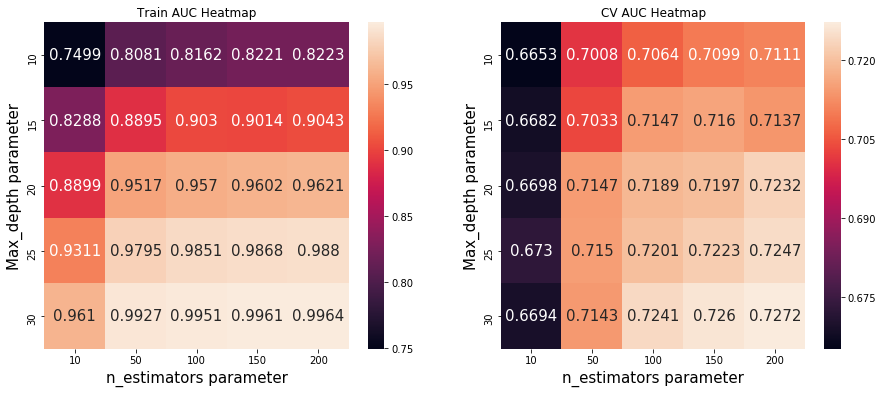

In [5]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 100, 150, 200],);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 100, 150, 200]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is observerd for row of max_depth 30, but there is huge difference in train AUC and test AUC for max_depth 30. But if for row max_depth 10, no matter what value of n_estimator we have, the difference in train and test AUC is less.

In [11]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0    0.084614
1    0.107299
2    0.109736
4    0.111140
3    0.112268
dtype: float64
________________
CV Auc:
  0    0.665273
1    0.700825
2    0.706447
4    0.711123
3    0.709875
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.095535      0.449354         0.200745        0.007769   
1       1.555178      0.152120         0.229055        0.053153   
2       2.427118      0.182794         0.310593        0.019250   
4       3.561766      0.114888         0.537434        0.001285   
3       2.793699      0.117335         0.440029        0.007209   

  param_max_depth param_n_estimators                                  params  \
0              10                 10   {'max_depth': 10, 'n_estimators': 10}   
1              10                 50   {'max_depth': 10, 'n_estimators': 50}   
2              10                100  {'max_depth': 10, 'n_estimators': 100}   
4              10                200  {'max_depth': 10, 'n_estimators': 200}   
3              10                150  {'max_depth': 10, 'n_estimators': 150}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.662668           0.680624           0.652525         0.665273   
1           0.701585           0.712691           0.688200         0.700825   
2           0.702802           0.713396           0.703143         0.706447   
4           0.708668           0.717108           0.707592         0.711123   
3           0.709419           0.713728           0.706478         0.709875   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.011618               25            0.742816            0.764553   
1        0.010013               20            0.809078            0.816380   
2        0.004916               18            0.811819            0.821214   
4        0.004255               16            0.819809            0.822852   
3        0.002977               17            0.820765            0.824613   

   split2_train_score  mean_train_score  std_train_score  
0            0.742291          0.749887         0.010373  
1            0.798917          0.808125         0.007161  
2            0.815517          0.816183         0.003864  
4            0.824128          0.822263         0.001812  
3            0.821050          0.822143         0.001751

<font color = 'blue'>For set 1(BOW), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 10 and n_estimators = 200 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh RandomForestClassifier model using best 'max_depth': 10, 'n_estiamtors': 200 and find the AUC on test data and plot the ROC curve on both train and test data.

In [12]:
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(class_weight='balanced',max_depth= 10,
                               n_estimators= 200, n_jobs=-1)
model.fit(train_bow, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [13]:
y_train_pred = model.predict_proba(train_bow)[:,1]
y_test_pred = model.predict_proba(test_bow)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

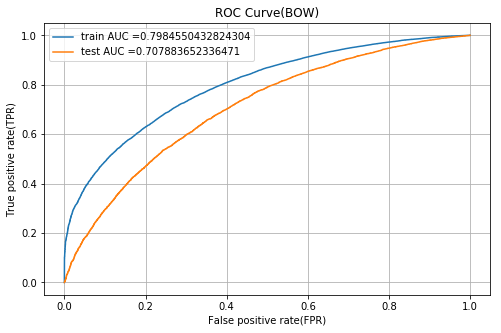

In [14]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(BOW)")
plt.grid()
plt.show()

AUC for train set is 0.79, and AUC for test set is 0.70

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [15]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_bow))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_bow))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

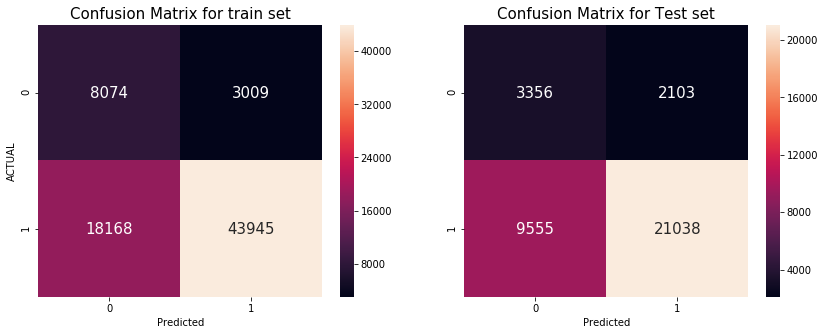

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set1(BOW), on test data RandomForestClassifier model has high TPR and low FPR.

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [17]:
import pickle
#loading Set 1 data
with open('train_tfidf.pickle', 'rb') as f:
    train_tfidf = pickle.load(f)
    
with open('test_tfidf.pickle', 'rb') as f:
    test_tfidf = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'max_depth': [10, 15, 20, 25, 30]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True, refit= False)
clf.fit(train_tfidf, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [19]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [20]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                        
param_n_estimators              10        50        100       150       200
param_max_depth                                                            
10                         0.764453  0.823207  0.835828  0.840837  0.843307
15                         0.848680  0.912271  0.923785  0.927222  0.929196
20                         0.908069  0.968081  0.974348  0.976071  0.977617
25                         0.950640  0.990449  0.993206  0.994761  0.994960
30                         0.972420  0.997300  0.998577  0.999021  0.999232
                   mean_test_score                                        
param_n_estimators             10        50        100       150       200
param_max_depth                                                           
10                        0.650751  0.695130  0.707161  0.709185  0.709343
15                        0.666760  0.702383  0.713918  0.712282  0.714072
20               

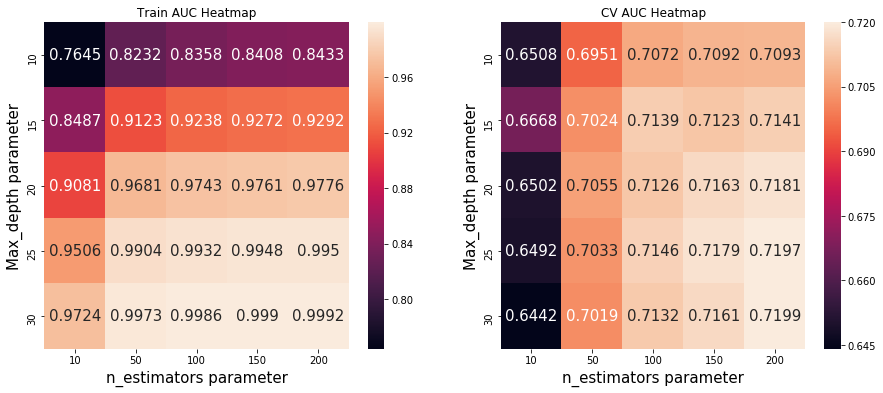

In [21]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 100, 150, 200],);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 100, 150, 200]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC on CV data is observerd for columns of n_estimators 200 and 150, but there is huge difference in train AUC and CV AUC for these two columns which corresponds to n_estimators = 200, 150. 

In [22]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0    0.113702
1    0.128077
2    0.128667
3    0.131652
4    0.133963
dtype: float64
________________
CV Auc:
  0    0.650751
1    0.695130
2    0.707161
3    0.709185
4    0.709343
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.564038      2.625049         0.177008        0.001261   
1       1.641375      0.026192         0.175819        0.000803   
2       2.903927      0.081641         0.280271        0.001626   
3       4.088089      0.064569         0.382452        0.001207   
4       5.731553      0.029305         0.486309        0.003338   

  param_max_depth param_n_estimators                                  params  \
0              10                 10   {'max_depth': 10, 'n_estimators': 10}   
1              10                 50   {'max_depth': 10, 'n_estimators': 50}   
2              10                100  {'max_depth': 10, 'n_estimators': 100}   
3              10                150  {'max_depth': 10, 'n_estimators': 150}   
4              10                200  {'max_depth': 10, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.647931           0.662203           0.642120         0.650751   
1           0.695546           0.699500           0.690343         0.695130   
2           0.707953           0.705523           0.708007         0.707161   
3           0.709897           0.713341           0.704318         0.709185   
4           0.710024           0.717478           0.700527         0.709343   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.008438               22            0.755450            0.768129   
1        0.003750               20            0.821805            0.821764   
2        0.001159               15            0.840723            0.829001   
3        0.003718               14            0.837179            0.842897   
4        0.006937               13            0.842243            0.845544   

   split2_train_score  mean_train_score  std_train_score  
0            0.769780          0.764453         0.006402  
1            0.826052          0.823207         0.002011  
2            0.837761          0.835828         0.004977  
3            0.842435          0.840837         0.002594  
4            0.842133          0.843307         0.001583

<font color = 'blue'>For set 2(TFIDF), by observing the heatmap together with few line of code to select best hyperparameters. We have choosen max_depth = 10 and n_estimators = 150 because these value of hyperparameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh RandomForestClassifier model using best 'max_depth': 10, 'n_estiamtors': 150 and find the AUC on test data and plot the ROC curve on both train and test data.

In [23]:
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(class_weight='balanced',max_depth= 10,
                               n_estimators= 150, n_jobs=-1)
model.fit(train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [24]:
y_train_pred = model.predict_proba(train_tfidf)[:,1]
y_test_pred = model.predict_proba(test_tfidf)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

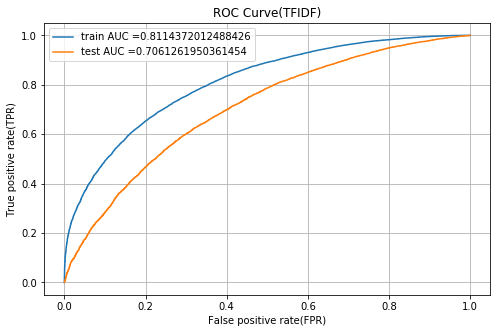

In [25]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(TFIDF)")
plt.grid()
plt.show()

AUC for train set is 0.81, and AUC for test set is 0.70

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_tfidf))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_tfidf))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

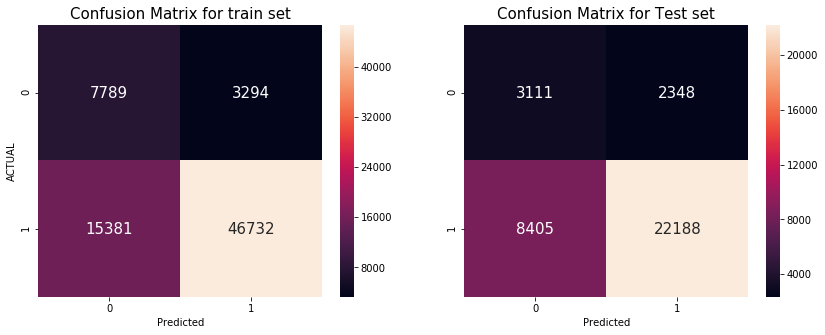

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set2(TFIDF), on test data RandomForestClassifier model has high TPR and low FPR.

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [1]:
import pickle
#loading set 3 data
with open('train_avgw2v.pickle', 'rb') as f:
    train_avgw2v = pickle.load(f)
    
with open('test_avgw2v.pickle', 'rb') as f:
    test_avgw2v = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators':[10, 50, 80, 100, 150], 'max_depth': [5, 7, 10, 15, 20]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True, refit= False)
clf.fit(train_avgw2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 80, 100, 150], 'max_depth': [5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [3]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [4]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                        
param_n_estimators              10        50        80        100       150
param_max_depth                                                            
5                          0.716090  0.739536  0.741543  0.742021  0.741340
7                          0.774419  0.794557  0.798003  0.798998  0.800494
10                         0.879054  0.916720  0.921262  0.923031  0.923421
15                         0.983627  0.997364  0.997815  0.997909  0.998243
20                         0.997260  0.999932  0.999972  0.999984  0.999990
                   mean_test_score                                        
param_n_estimators             10        50        80        100       150
param_max_depth                                                           
5                         0.681523  0.703285  0.704973  0.705071  0.703294
7                         0.693944  0.707607  0.712044  0.713507  0.713400
10               

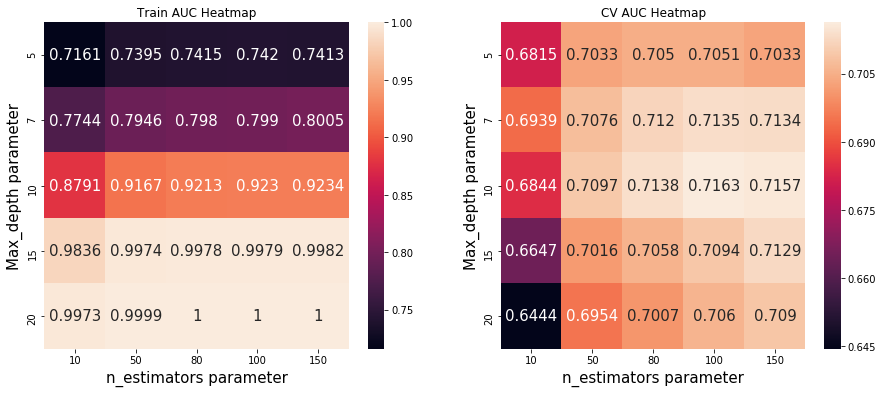

In [5]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 80, 100, 150]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 80, 100, 150]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC on CV data is observerd for columns corresponding to n_estimators 100 and 150, but there is huge difference in train AUC and CV AUC if max_depth is more than 7. But if for row max_depth 5 and 7, no matter what value of n_estimator we have, the difference in train and test AUC is less.

In [6]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0    0.034567
1    0.036251
2    0.036570
3    0.036950
4    0.038047
dtype: float64
________________
CV Auc:
  0    0.681523
1    0.703285
2    0.704973
3    0.705071
4    0.703294
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.637854      0.811919         0.254169        0.012653   
1       6.219810      0.158346         0.380731        0.014960   
2       9.747235      0.144936         0.476966        0.004581   
3      11.894234      0.022379         0.482269        0.001659   
4      17.446325      0.066421         0.575570        0.004358   

  param_max_depth param_n_estimators                                 params  \
0               5                 10   {'max_depth': 5, 'n_estimators': 10}   
1               5                 50   {'max_depth': 5, 'n_estimators': 50}   
2               5                 80   {'max_depth': 5, 'n_estimators': 80}   
3               5                100  {'max_depth': 5, 'n_estimators': 100}   
4               5                150  {'max_depth': 5, 'n_estimators': 150}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.694739           0.688763           0.661066         0.681523   
1           0.705811           0.703367           0.700677         0.703285   
2           0.707697           0.707695           0.699527         0.704973   
3           0.709290           0.706570           0.699351         0.705071   
4           0.709389           0.705677           0.694814         0.703294   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.014669               23            0.724547            0.717236   
1        0.002097               17            0.740444            0.736785   
2        0.003851               15            0.744214            0.740158   
3        0.004194               14            0.743852            0.739920   
4        0.006185               16            0.744098            0.740552   

   split2_train_score  mean_train_score  std_train_score  
0            0.706487          0.716090         0.007418  
1            0.741379          0.739536         0.001982  
2            0.740257          0.741543         0.001889  
3            0.742289          0.742021         0.001616  
4            0.739372          0.741340         0.002009

<font color = 'blue'>For set 3(AVGW2V), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 5 and n_estimators = 100 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh RandomForestClassifier model using best 'max_depth': 5, 'n_estiamtors': 100 and find the AUC on test data and plot the ROC curve on both train and test data.

In [7]:
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(class_weight='balanced',max_depth= 5,
                               n_estimators= 100, n_jobs=-1)
model.fit(train_avgw2v, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [8]:
y_train_pred = model.predict_proba(train_avgw2v)[:,1]
y_test_pred = model.predict_proba(test_avgw2v)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

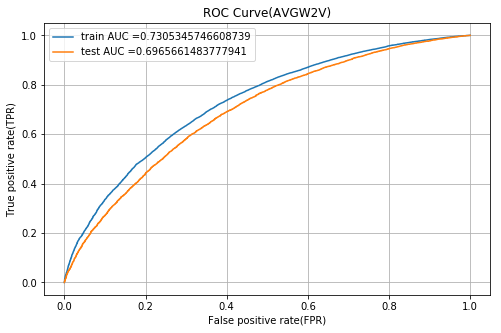

In [9]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(AVGW2V)")
plt.grid()
plt.show()

AUC for train set is 0.73, and AUC for test set is 0.69

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_avgw2v))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_avgw2v))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

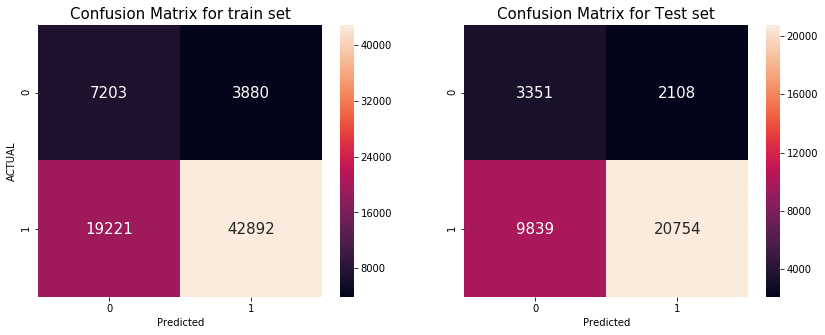

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set3(AVGW2V), on test data RandomForestClassifier model has high TPR and low FPR.

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [12]:
import pickle
#loading Set 4 data
with open('train_tfidfw2v.pickle', 'rb') as f:
    train_tfidfw2v = pickle.load(f)
    
with open('test_tfidfw2v.pickle', 'rb') as f:
    test_tfidfw2v = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators':[10, 50, 80, 100, 150], 'max_depth': [5, 7, 10, 15, 20]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True, refit= False)
clf.fit(train_tfidfw2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 80, 100, 150], 'max_depth': [5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [14]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [15]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                        
param_n_estimators              10        50        80        100       150
param_max_depth                                                            
5                          0.723474  0.741607  0.741725  0.743303  0.743152
7                          0.771458  0.792102  0.795157  0.795116  0.796541
10                         0.880572  0.908145  0.913551  0.915367  0.915506
15                         0.980599  0.995562  0.996681  0.996871  0.997265
20                         0.996759  0.999890  0.999938  0.999960  0.999970
                   mean_test_score                                        
param_n_estimators             10        50        80        100       150
param_max_depth                                                           
5                         0.694401  0.707684  0.707685  0.709863  0.708756
7                         0.695072  0.714104  0.715626  0.713828  0.715418
10               

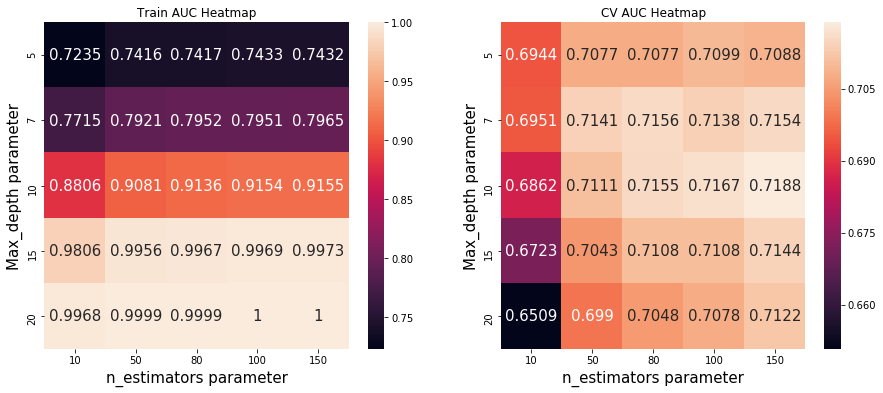

In [16]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 80, 100, 150]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[10, 50, 80, 100, 150]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC on CV data is observerd for columns corresponding to n_estimators 100 and 150, but there is huge difference in train AUC and CV AUC if max_depth is more than 7. But if for row max_depth 5 and 7, no matter what value of n_estimator we have, the difference in train and test AUC is less.

In [17]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0    0.029073
3    0.033440
1    0.033922
2    0.034040
4    0.034395
dtype: float64
________________
CV Auc:
  0    0.694401
3    0.709863
1    0.707684
2    0.707685
4    0.708756
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.818485      3.935997         0.269083        0.003781   
3      11.341421      0.238647         0.473744        0.005849   
1       6.344466      0.012430         0.368118        0.002139   
2       9.293078      0.117893         0.473125        0.006608   
4      17.223549      0.271694         0.577808        0.000877   

  param_max_depth param_n_estimators                                 params  \
0               5                 10   {'max_depth': 5, 'n_estimators': 10}   
3               5                100  {'max_depth': 5, 'n_estimators': 100}   
1               5                 50   {'max_depth': 5, 'n_estimators': 50}   
2               5                 80   {'max_depth': 5, 'n_estimators': 80}   
4               5                150  {'max_depth': 5, 'n_estimators': 150}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.693891           0.697815           0.691498         0.694401   
3           0.712926           0.712974           0.703688         0.709863   
1           0.709773           0.710833           0.702446         0.707684   
2           0.709467           0.712074           0.701514         0.707685   
4           0.709622           0.713775           0.702871         0.708756   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002604               22            0.723185            0.723514   
3        0.004366               13            0.743569            0.741182   
1        0.003729               17            0.741492            0.741066   
2        0.004491               16            0.743038            0.742341   
4        0.004494               14            0.742726            0.743027   

   split2_train_score  mean_train_score  std_train_score  
0            0.723722          0.723474         0.000221  
3            0.745157          0.743303         0.001634  
1            0.742261          0.741607         0.000495  
2            0.739795          0.741725         0.001394  
4            0.743702          0.743152         0.000408

<font color = 'blue'>For set 4(TFIDFW2V), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 5 and n_estimators = 100 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh RandomForestClassifier model using best 'max_depth': 5, 'n_estiamtors': 100 and find the AUC on test data and plot the ROC curve on both train and test data.

In [18]:
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(class_weight='balanced',max_depth= 5,
                               n_estimators= 100, n_jobs=-1)
model.fit(train_tfidfw2v, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [19]:
y_train_pred = model.predict_proba(train_tfidfw2v)[:,1]
y_test_pred = model.predict_proba(test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

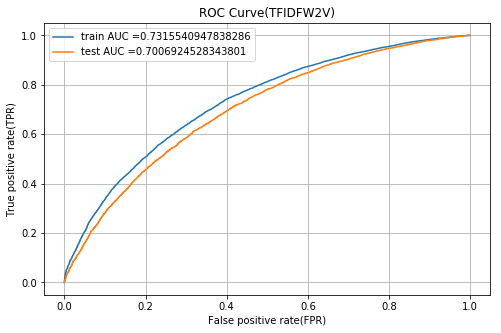

In [20]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(TFIDFW2V)")
plt.grid()
plt.show()

AUC for train set is 0.73, and AUC for test set is 0.70

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_tfidfw2v))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_tfidfw2v))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

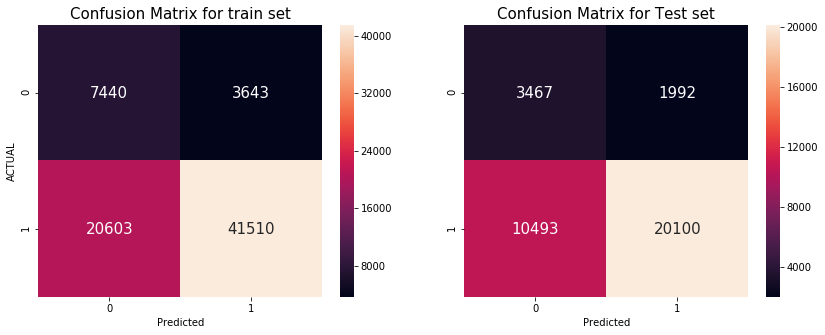

In [22]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set 4(TFIDFW2V), on test data RandomForestClassifier model has high TPR and low FPR.

<h2>2.5 Applying GBDT</h2>

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [1]:
import pickle
#loading Set 1 data
with open('train_bow.pickle', 'rb') as f:
    train_bow = pickle.load(f)
    
with open('test_bow.pickle', 'rb') as f:
    test_bow = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

We will use Lightgbm's LGBMClassifier instead of sklearn's GradientBoostingClassifier because it is taking too much time too run. Hence we will opt for LGBMClassifier.

In [2]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [3]:
#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
#https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

gridparams = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000],'max_depth': [2, 5, 8, 10]}
model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',random_state=345)

clf = GridSearchCV(model, param_grid= gridparams, cv=3, scoring='roc_auc',return_train_score=True, refit=False)
clf.fit(train_bow, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=345, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth': [2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [4]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [5]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                          \
param_n_estimators             5         10        50        100       200    
param_max_depth                                                               
2                          0.651180  0.673296  0.720972  0.741337  0.764826   
5                          0.712737  0.731779  0.796348  0.831422  0.871398   
8                          0.723683  0.740385  0.818486  0.865819  0.914768   
10                         0.725282  0.741450  0.820539  0.869614  0.922158   

                                        
param_n_estimators      500       1000  
param_max_depth                         
2                   0.801273  0.835293  
5                   0.929013  0.970592  
8                   0.973005  0.996632  
10                  0.980792  0.998705  
                   mean_test_score                                          \
param_n_estimators            5         10        50        100       200    
par

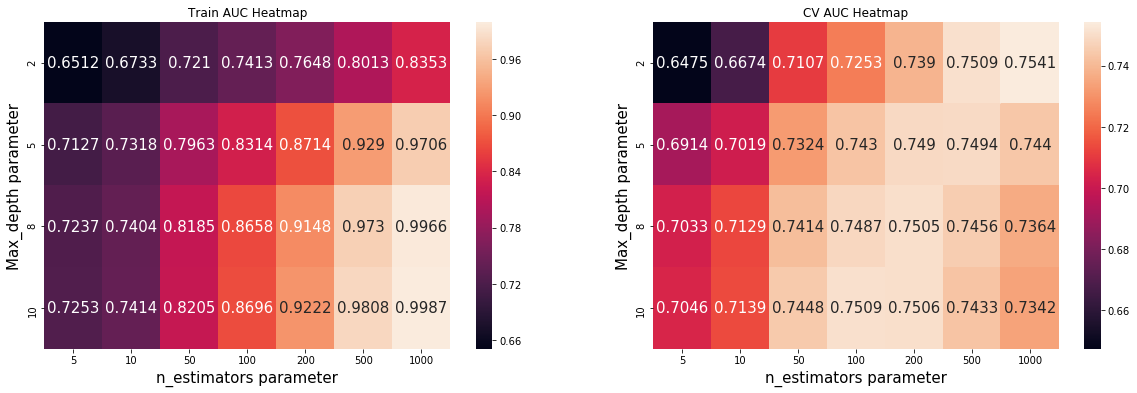

In [6]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is around 0.75 which is observerd for some values of (max_depth, n_estiomators). Like for max_depth= 2 and n_estimator=500, 1000 we are getting maximum AUC. But there is large
difference in train AUC and CV AUC for these values.

In [7]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0     0.003636
1     0.005910
2     0.010264
3     0.015996
14    0.020430
dtype: float64
________________
CV Auc:
  0     0.647544
1     0.667386
2     0.710708
3     0.725341
14    0.703254
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.800825      0.065154         0.032912        0.005085   
1        2.981535      0.055634         0.037566        0.002487   
2        4.226380      0.072541         0.057831        0.007780   
3        6.098027      0.030545         0.071808        0.004310   
14       3.598051      0.041140         0.039029        0.004568   

   param_max_depth param_n_estimators                                 params  \
0                2                  5    {'max_depth': 2, 'n_estimators': 5}   
1                2                 10   {'max_depth': 2, 'n_estimators': 10}   
2                2                 50   {'max_depth': 2, 'n_estimators': 50}   
3                2                100  {'max_depth': 2, 'n_estimators': 100}   
14               8                  5    {'max_depth': 8, 'n_estimators': 5}   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.644730           0.647763           0.650140         0.647544   
1            0.667597           0.670077           0.664484         0.667386   
2            0.709778           0.715977           0.706368         0.710708   
3            0.724976           0.729517           0.721531         0.725341   
14           0.701541           0.712392           0.695829         0.703254   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.002214               28            0.649840            0.648194   
1         0.002288               27            0.674391            0.672202   
2         0.003977               22            0.720992            0.719570   
3         0.003270               19            0.742729            0.739517   
14        0.006869               24            0.725176            0.722368   

    split2_train_score  mean_train_score  std_train_score  
0             0.655506          0.651180         0.003132  
1             0.673295          0.673296         0.000894  
2             0.722355          0.720972         0.001137  
3             0.741766          0.741337         0.001346  
14            0.723507          0.723683         0.001153

<font color = 'blue'>For set 1(BOW), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 2 and n_estimators = 100 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh LGBMClassifier model using best 'max_depth': 2, 'n_estiamtors': 100 and find the AUC on test data and plot the ROC curve on both train and test data.

In [8]:
from sklearn.metrics import roc_curve, auc

model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',
                          max_depth=2,n_estimators=100)

model.fit(train_bow, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=2, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
y_train_pred = model.predict_proba(train_bow)[:,1]
y_test_pred = model.predict_proba(test_bow)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

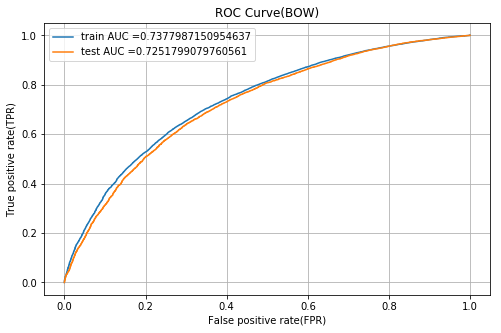

In [11]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(BOW)")
plt.grid()
plt.show()

AUC for train set is 0.73, and AUC for test set is 0.72

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [12]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_bow))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_bow))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

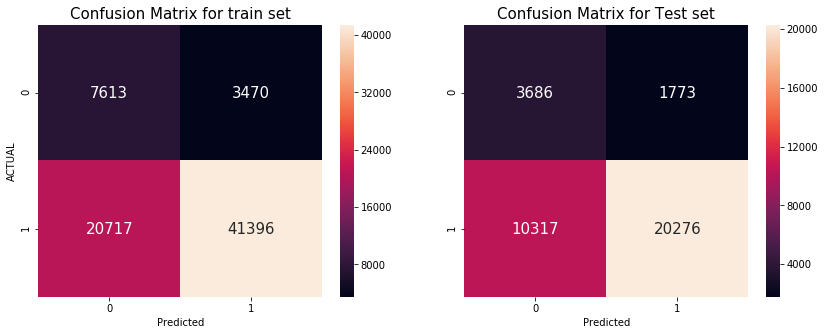

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set1(BOW), on test data LGBMClassifier model has high TPR and low FPR.

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [14]:
import pickle
#loading Set 2 data
with open('train_tfidf.pickle', 'rb') as f:
    train_tfidf = pickle.load(f)
    
with open('test_tfidf.pickle', 'rb') as f:
    test_tfidf = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

We will use Lightgbm's LGBMClassifier instead of sklearn's GradientBoostingClassifier because it is taking too much time too run. Hence we will opt for LGBMClassifier.

In [15]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [16]:
#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
#https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

gridparams = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000],'max_depth': [2, 5, 8, 10]}
model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary', random_state=32)

clf = GridSearchCV(model, param_grid= gridparams, cv=3, scoring='roc_auc',return_train_score=True, refit=False)
clf.fit(train_tfidf, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=32, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth': [2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [17]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [18]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                          \
param_n_estimators             5         10        50        100       200    
param_max_depth                                                               
2                          0.659099  0.677031  0.723869  0.746592  0.773271   
5                          0.718773  0.738757  0.809261  0.846359  0.886938   
8                          0.729210  0.747180  0.834618  0.883074  0.931451   
10                         0.730240  0.747470  0.836355  0.888280  0.940576   

                                        
param_n_estimators      500       1000  
param_max_depth                         
2                   0.815862  0.857621  
5                   0.944385  0.983025  
8                   0.983880  0.998759  
10                  0.990198  0.999687  
                   mean_test_score                                          \
param_n_estimators            5         10        50        100       200    
par

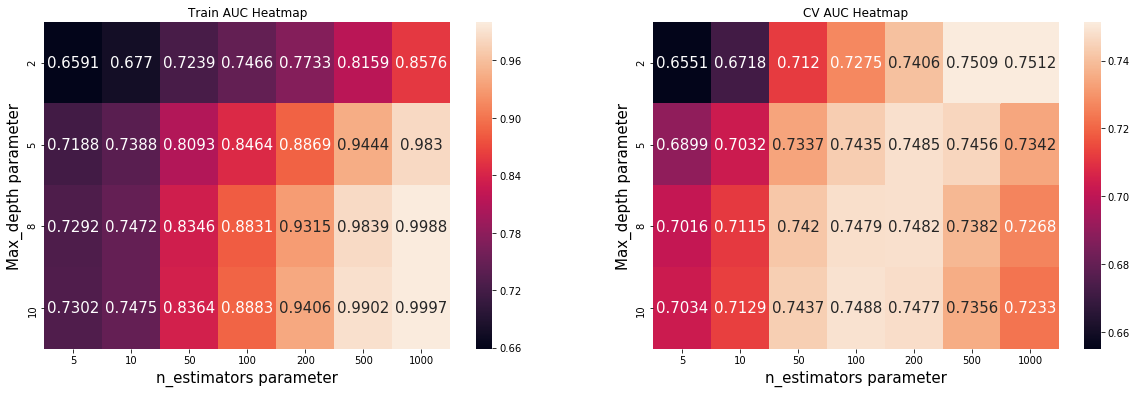

In [19]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is around 0.75 which is observerd for some values of (max_depth, n_estiomators). Like for max_depth= 2 and n_estimator=500,1000 we are getting maximum AUC. But there is large difference in train AUC and CV AUC for these values.

In [20]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0     0.003955
1     0.005273
2     0.011864
3     0.019093
21    0.026793
dtype: float64
________________
CV Auc:
  0     0.655143
1     0.671758
2     0.712005
3     0.727499
21    0.703447
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.259273      0.168545         0.031250    1.288407e-02   
1        1.688820      0.018647         0.016955    1.123916e-07   
2        3.076114      0.031710         0.029920    1.410683e-03   
3        4.666198      0.072307         0.061502    3.060326e-02   
21       2.927510      0.076799         0.042553    3.198055e-02   

   param_max_depth param_n_estimators                                 params  \
0                2                  5    {'max_depth': 2, 'n_estimators': 5}   
1                2                 10   {'max_depth': 2, 'n_estimators': 10}   
2                2                 50   {'max_depth': 2, 'n_estimators': 50}   
3                2                100  {'max_depth': 2, 'n_estimators': 100}   
21              10                  5   {'max_depth': 10, 'n_estimators': 5}   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.655040           0.654967           0.655424         0.655143   
1            0.671469           0.673999           0.669806         0.671758   
2            0.712139           0.716442           0.707434         0.712005   
3            0.728059           0.731195           0.723243         0.727499   
21           0.703169           0.709879           0.697294         0.703447   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.000201               28            0.659463            0.656534   
1         0.001724               27            0.674312            0.676530   
2         0.003678               21            0.723426            0.722826   
3         0.003270               17            0.747052            0.745595   
21        0.005142               23            0.732034            0.727258   

    split2_train_score  mean_train_score  std_train_score  
0             0.661299          0.659099         0.001962  
1             0.680250          0.677031         0.002450  
2             0.725355          0.723869         0.001079  
3             0.747128          0.746592         0.000705  
21            0.731428          0.730240         0.002123

<font color = 'blue'>For set 2(TFIDF), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 2 and n_estimators = 100 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh LGBMClassifier model using best 'max_depth': 2, 'n_estiamtors': 100 and find the AUC on test data and plot the ROC curve on both train and test data.

In [21]:
from sklearn.metrics import roc_curve, auc

model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',random_state=32,
                          max_depth=2,n_estimators=100)

model.fit(train_tfidf, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=2, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=32, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
y_train_pred = model.predict_proba(train_tfidf)[:,1]
y_test_pred = model.predict_proba(test_tfidf)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

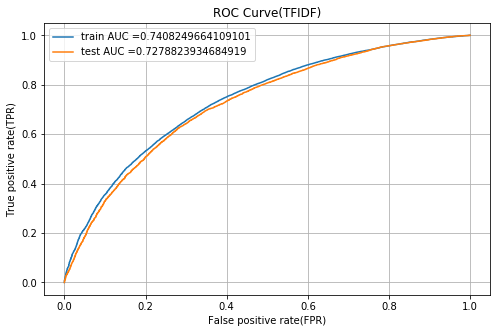

In [24]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(TFIDF)")
plt.grid()
plt.show()

AUC for train set is 0.74, and AUC for test set is 0.72

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [25]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_tfidf))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_tfidf))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

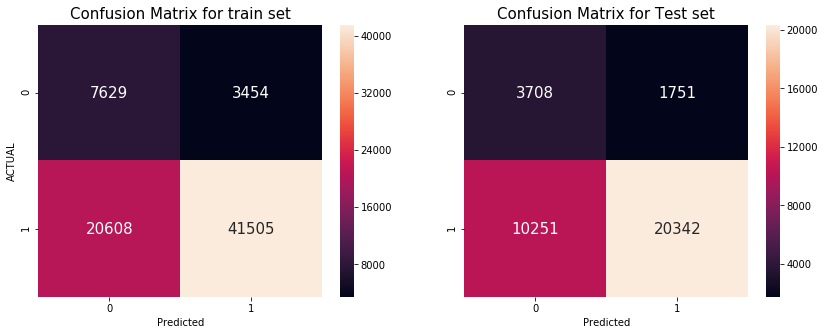

In [26]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set 2(TFIDF), on test data LGBMClassifier model has high TPR and low FPR.

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [27]:
import pickle
#loading set 3 data
with open('train_avgw2v.pickle', 'rb') as f:
    train_avgw2v = pickle.load(f)
    
with open('test_avgw2v.pickle', 'rb') as f:
    test_avgw2v = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

We will use Lightgbm's LGBMClassifier instead of sklearn's GradientBoostingClassifier because it is taking too much time too run. Hence we will opt for LGBMClassifier.

In [28]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [29]:
#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
#https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

gridparams = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000],'max_depth': [2, 5, 8, 10]}
model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',random_state=32)

clf = GridSearchCV(model, param_grid= gridparams, cv=3, scoring='roc_auc',return_train_score=True, refit=False)
clf.fit(train_avgw2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=32, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth': [2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [30]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [31]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                          \
param_n_estimators             5         10        50        100       200    
param_max_depth                                                               
2                          0.663393  0.682293  0.724300  0.739264  0.755589   
5                          0.721356  0.741231  0.803679  0.844124  0.899283   
8                          0.727946  0.744942  0.816295  0.870282  0.933439   
10                         0.727773  0.744678  0.818617  0.873191  0.936525   

                                        
param_n_estimators      500       1000  
param_max_depth                         
2                   0.785443  0.817454  
5                   0.974187  0.998072  
8                   0.990978  0.999752  
10                  0.992134  0.999804  
                   mean_test_score                                          \
param_n_estimators            5         10        50        100       200    
par

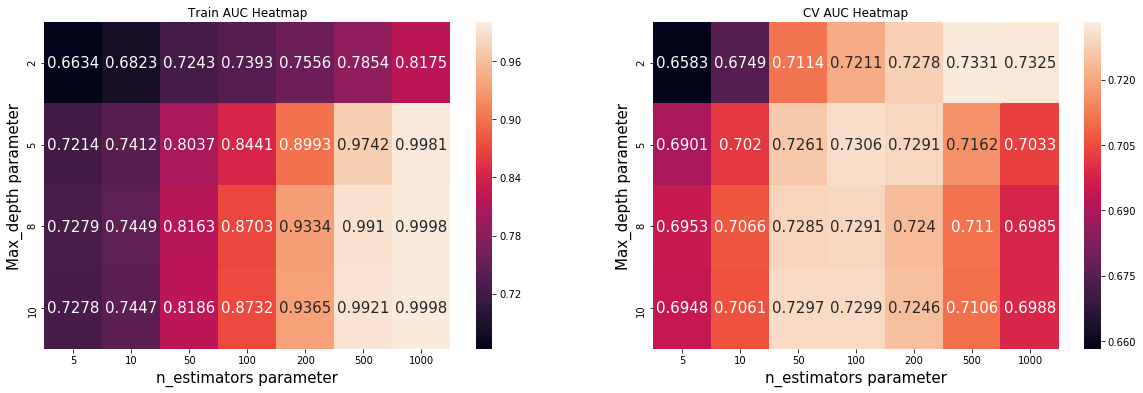

In [32]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is around 0.73 which is observerd for some values of (max_depth, n_estiomators). Like for max_depth= 2 and n_estimator=1000 we are getting maximum AUC. But there is large difference in train AUC and CV AUC for these values.

In [33]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0    0.005133
1    0.007401
2    0.012883
3    0.018205
4    0.027744
dtype: float64
________________
CV Auc:
  0    0.658260
1    0.674892
2    0.711418
3    0.721058
4    0.727846
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.366006      0.010934         0.012632        0.000940   
1       0.385304      0.007567         0.026263        0.018806   
2       0.531580      0.013553         0.020279        0.003291   
3       0.714092      0.058291         0.027261        0.007523   
4       0.982375      0.011996         0.035239        0.001243   

  param_max_depth param_n_estimators                                 params  \
0               2                  5    {'max_depth': 2, 'n_estimators': 5}   
1               2                 10   {'max_depth': 2, 'n_estimators': 10}   
2               2                 50   {'max_depth': 2, 'n_estimators': 50}   
3               2                100  {'max_depth': 2, 'n_estimators': 100}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.657998           0.658907           0.657875         0.658260   
1           0.674148           0.677563           0.672964         0.674892   
2           0.713472           0.710385           0.710397         0.711418   
3           0.722178           0.721707           0.719290         0.721058   
4           0.728913           0.729451           0.725173         0.727846   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000460               28            0.662393            0.662577   
1        0.001950               27            0.678587            0.684053   
2        0.001452               15            0.723621            0.723293   
3        0.001265               13            0.739111            0.737689   
4        0.001902                9            0.755902            0.753247   

   split2_train_score  mean_train_score  std_train_score  
0            0.665209          0.663393         0.001286  
1            0.684239          0.682293         0.002622  
2            0.725987          0.724300         0.001200  
3            0.740991          0.739264         0.001352  
4            0.757619          0.755589         0.001798

<font color = 'blue'>For set 3(AVGW2V), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 2 and n_estimators = 200 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh LGBMClassifier model using best 'max_depth': 2, 'n_estiamtors': 200 and find the AUC on test data and plot the ROC curve on both train and test data.

In [34]:
from sklearn.metrics import roc_curve, auc

model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',random_state=32,
                          max_depth=2,n_estimators=200)

model.fit(train_avgw2v, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=2, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=32, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
y_train_pred = model.predict_proba(train_avgw2v)[:,1]
y_test_pred = model.predict_proba(test_avgw2v)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

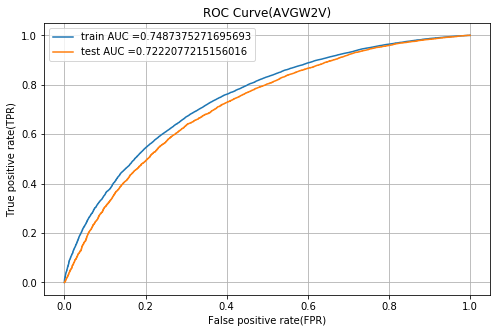

In [37]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(AVGW2V)")
plt.grid()
plt.show()

AUC for train set is 0.74, and AUC for test set is 0.72

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_avgw2v))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_avgw2v))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

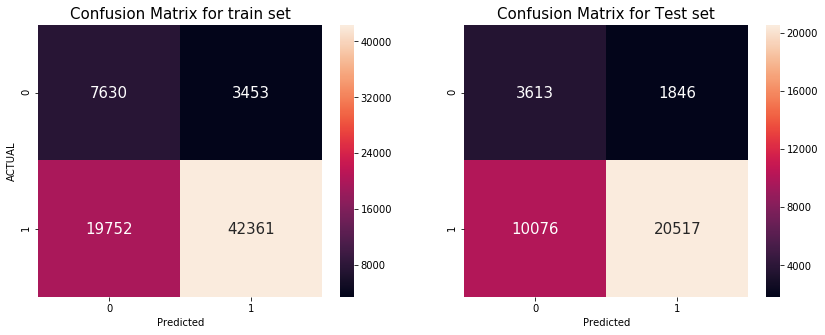

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set 3(AVGW2V), on test data LGBMClassifier model has high TPR and low FPR.

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [40]:
import pickle
#loading Set 4 data
with open('train_tfidfw2v.pickle', 'rb') as f:
    train_tfidfw2v = pickle.load(f)
    
with open('test_tfidfw2v.pickle', 'rb') as f:
    test_tfidfw2v = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

We will use Lightgbm's LGBMClassifier instead of sklearn's GradientBoostingClassifier because it is taking too much time too run. Hence we will opt for LGBMClassifier.

In [41]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [42]:
#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
#https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

gridparams = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000],'max_depth': [2, 5, 8, 10]}
model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',random_state=32)

clf = GridSearchCV(model, param_grid= gridparams, cv=3, scoring='roc_auc',return_train_score=True, refit=False)
clf.fit(train_tfidfw2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=32, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth': [2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [43]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [44]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_n_estimators', values=['mean_test_score'])
print(train_score)
print(cv_score)

                   mean_train_score                                          \
param_n_estimators             5         10        50        100       200    
param_max_depth                                                               
2                          0.667310  0.687003  0.728863  0.742064  0.757444   
5                          0.723358  0.743027  0.803001  0.842180  0.897966   
8                          0.728779  0.747055  0.816088  0.868401  0.932222   
10                         0.729747  0.747588  0.817967  0.871546  0.935201   

                                        
param_n_estimators      500       1000  
param_max_depth                         
2                   0.785255  0.815765  
5                   0.975110  0.998151  
8                   0.991348  0.999791  
10                  0.992528  0.999855  
                   mean_test_score                                          \
param_n_estimators            5         10        50        100       200    
par

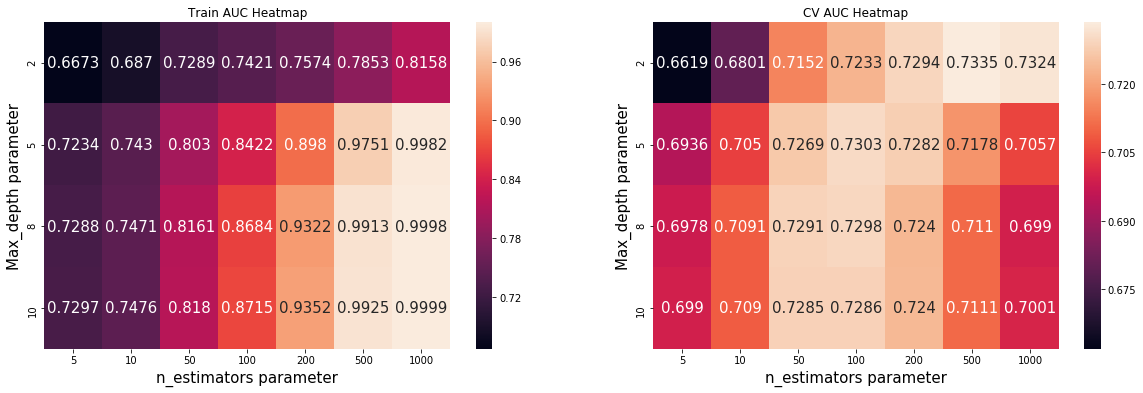

In [45]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5, 10, 50, 100, 200, 500, 1000]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('n_estimators parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is around 0.73 which is observerd for some values of (max_depth, n_estiomators). Like for max_depth= 2 and n_estimator=500 we are getting maximum AUC. But there is more difference in train AUC and CV AUC for these values.

In [46]:
#difference in mean_train_score and mean_test_score 
diff = cvr['mean_train_score'] - cvr['mean_test_score']
#Sorting the difference(diff) and selecting the indexes which corresponds to minimum difference in train and test scores 
#with more test_score value
ind = np.argsort(diff)[:5]
print(diff[ind])
print("________________")
print('CV Auc:\n ',cvr.loc[ind,'mean_test_score'])
cvr.loc[ind,:]

0    0.005362
1    0.006880
2    0.013654
3    0.018745
4    0.028081
dtype: float64
________________
CV Auc:
  0    0.661948
1    0.680123
2    0.715209
3    0.723319
4    0.729363
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.356752      0.007341         0.010306        0.000470   
1       0.373003      0.001411         0.011636        0.000470   
2       0.582776      0.058133         0.022274        0.002618   
3       0.686499      0.021457         0.022939        0.000814   
4       1.115685      0.168919         0.034242        0.001244   

  param_max_depth param_n_estimators                                 params  \
0               2                  5    {'max_depth': 2, 'n_estimators': 5}   
1               2                 10   {'max_depth': 2, 'n_estimators': 10}   
2               2                 50   {'max_depth': 2, 'n_estimators': 50}   
3               2                100  {'max_depth': 2, 'n_estimators': 100}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.664365           0.660439           0.661040         0.661948   
1           0.679539           0.679301           0.681530         0.680123   
2           0.716070           0.716033           0.713525         0.715209   
3           0.724057           0.725070           0.720831         0.723319   
4           0.730061           0.732170           0.725859         0.729363   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001727               28            0.671109            0.665302   
1        0.000999               27            0.686697            0.684325   
2        0.001191               15            0.728890            0.727187   
3        0.001808               13            0.741981            0.739944   
4        0.002623                5            0.756726            0.755421   

   split2_train_score  mean_train_score  std_train_score  
0            0.665521          0.667310         0.002687  
1            0.689988          0.687003         0.002322  
2            0.730513          0.728863         0.001358  
3            0.744267          0.742064         0.001766  
4            0.760185          0.757444         0.002010

<font color = 'blue'>For Set 4(TFIDFW2V), by observing the heatmap together with few line of code to select best parameters. We have choosen max_depth = 2 and n_estimators = 200 because these value of parameters satisfy our two criterias very well i.e difference in train and test AUC is less also with hightest test AUC. Next, we will train a fresh LGBMClassifier model using best 'max_depth': 2, 'n_estiamtors': 200 and find the AUC on test data and plot the ROC curve on both train and test data.

In [47]:
from sklearn.metrics import roc_curve, auc

model = lgb.LGBMClassifier(n_jobs=-1,class_weight='balanced',objective='binary',random_state=32,
                          max_depth=2,n_estimators=200)

model.fit(train_tfidfw2v, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=2, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=32, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [48]:
y_train_pred = model.predict_proba(train_tfidfw2v)[:,1]
y_test_pred = model.predict_proba(test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

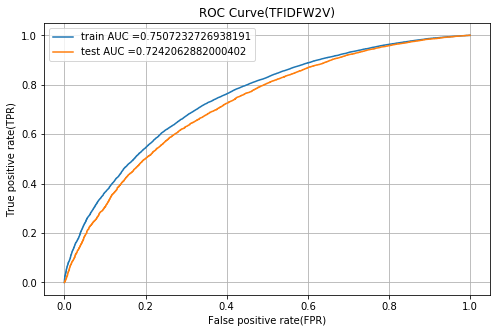

In [49]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(TFIDFW2V)")
plt.grid()
plt.show()

AUC for train set is 0.75, and AUC for test set is 0.72

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [50]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_tfidfw2v))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_tfidfw2v))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

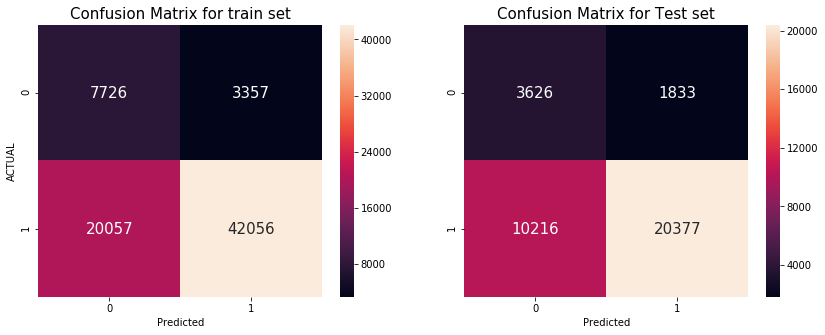

In [51]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set 4(TFIDFW2V), on test data LGBMClassifier model has high TPR and low FPR.

<h1>3. Conclusion</h1>

On Donors Choose dataset, we have applied Random Forest(Bagging) and GradientBoosting techniques to predict whether a project submitted should be approved or rejected. <br>
All the categorical variable are response coded instead of onehot encoding.<br>
We created four sets of features to build model, these sets are described below:<br>
1. Bag of word(BOW) method to vectorize text features.
2. TFIDF method to vectorize text features.
3. Average word2vec method to vectorize text features.
4. TFIDF word2vec method to vectorize text features.
On each of the set we have applied both bagging(RandomForestClassifier) and boosting(LGBMClassifier) ensembling techniques to classify wether a project should be approved or rejected.<br>
We have tuned two hyperparameters for every model we build, these were max_depth and n_estimators.<br>

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Vectorizer/Featurization', 'Model','HyperParameter(s)','Test AUC']

In [2]:
x.add_row([' ',' ',' max_depth  | n_estimators',' '])
x.add_row([' ',' ','--------------------------',' '])
x.add_row(['BOW', 'RandomForestClassifier','10  |  200', 0.70])
x.add_row(['TFIDF', 'RandomForestClassifier','10  |  200', 0.70])
x.add_row(['AVGW2V', 'RandomForestClassifier',' 5  |  100', 0.69])
x.add_row(['TFIDFW2V', 'RandomForestClassifier',' 5  |  100', 0.70])
x.add_row(['BOW', 'LGBMClassifier',' 2  |  100', 0.72])
x.add_row(['TFIDF', 'LGBMClassifier',' 2  |  100', 0.72])
x.add_row(['AVGW2V', 'LGBMClassifier',' 2  |  200', 0.72])
x.add_row(['TFIDFW2V', 'LGBMClassifier',' 2  |  200', 0.72])

In [3]:
print(x)

+--------------------------+------------------------+----------------------------+----------+
| Vectorizer/Featurization |         Model          |     HyperParameter(s)      | Test AUC |
+--------------------------+------------------------+----------------------------+----------+
|                          |                        |  max_depth  | n_estimators |          |
|                          |                        | -------------------------- |          |
|           BOW            | RandomForestClassifier |         10  |  200         |   0.7    |
|          TFIDF           | RandomForestClassifier |         10  |  200         |   0.7    |
|          AVGW2V          | RandomForestClassifier |          5  |  100         |   0.69   |
|         TFIDFW2V         | RandomForestClassifier |          5  |  100         |   0.7    |
|           BOW            |     LGBMClassifier     |          2  |  100         |   0.72   |
|          TFIDF           |     LGBMClassifier     |       

**Observations :**
1. Boosting(LGBMClassifier) performed better then RandomForestClassifier on all four sets.
2. We have obtained maximum AUC of 0.72 on test data.
3. For Random forest we have obtained test AUC of 0.70 atmost. 